<a href="https://colab.research.google.com/github/codebysoundarya/codebysoundarya/blob/main/Final_Deepfake_detection_XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


# Define the paths
train_dir = '/content/drive/MyDrive/Dataset_split/train'
validation_dir = '/content/drive/MyDrive/Dataset_split/val'
test_dir = '/content/drive/MyDrive/Dataset_split/test'

# Create an ImageDataGenerator object for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.4,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create ImageDataGenerator for validation and test sets (only rescaling)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


# Load the images and labels, ensuring grayscale (1 color channel)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(299, 299),        # Resize images to 299x299
    color_mode='rgb',        # Load images as rgb
    class_mode='categorical',
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(299, 299),
    color_mode='rgb',
    class_mode='categorical',
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(299, 299),
    color_mode='rgb',        # Load images as rgb
    class_mode='categorical',
    shuffle=False # Ensure order for evaluation metrics
)

Found 9023 images belonging to 2 classes.
Found 1933 images belonging to 2 classes.
Found 1935 images belonging to 2 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.layers import Dense
import numpy as np

**CNN Variant1 - 5 Conv2D layers, kernel size - 3*3**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
CNN1 = Sequential()

# Convolutional layers
CNN1.add(Conv2D(256, (3, 3), activation='relu', input_shape=(128, 128,1)))
#CNN1.add(BatchNormalization())
CNN1.add(MaxPooling2D(pool_size=(2, 2)))

CNN1.add(Conv2D(64, (3, 3), activation='relu'))
#CNN1.add(BatchNormalization())
CNN1.add(MaxPooling2D(pool_size=(2, 2)))

CNN1.add(Conv2D(256, (3, 3), activation='relu'))
#CNN1.add(BatchNormalization())
CNN1.add(MaxPooling2D(pool_size=(2, 2)))

CNN1.add(Conv2D(128, (3, 3), activation='relu'))
#CNN1.add(BatchNormalization())
CNN1.add(MaxPooling2D(pool_size=(2, 2)))

CNN1.add(Conv2D(256, (3, 3), activation='relu'))
#CNN1.add(BatchNormalization())
CNN1.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers before feeding into dense layers
CNN1.add(Flatten())

# Fully connected layers
CNN1.add(Dense(128, activation='relu'))
#CNN1.add(BatchNormalization())
CNN1.add(Dropout(0.2))  # Dropout to prevent overfitting
CNN1.add(Dense(64, activation='relu'))
#CNN1.add(BatchNormalization())
# Output layer (adjust number of units to match the number of classes)
CNN1.add(Dense(2, activation='softmax'))  # Corrected to 2 units for 2 classes

# Compile the model
CNN1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
CNN1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 126, 126, 256)  │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 61, 61, 64)     │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 256)    │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,027,586 (3.92 MB)

 Trainable params: 1,027,586 (3.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
CNN1.fit(train_generator,epochs=11)

Epoch 1/11
282/282 ━━━━━━━━━━━━━━━━━━━━ 3820s 14s/step - accuracy: 0.5338 - loss: 0.6923
Epoch 2/11
282/282 ━━━━━━━━━━━━━━━━━━━━ 49s 172ms/step - accuracy: 0.5358 - loss: 0.6908
Epoch 3/11
282/282 ━━━━━━━━━━━━━━━━━━━━ 47s 168ms/step - accuracy: 0.5370 - loss: 0.6908
Epoch 4/11
282/282 ━━━━━━━━━━━━━━━━━━━━ 82s 169ms/step - accuracy: 0.5448 - loss: 0.6894
Epoch 5/11
282/282 ━━━━━━━━━━━━━━━━━━━━ 47s 166ms/step - accuracy: 0.5455 - loss: 0.6892
Epoch 6/11
282/282 ━━━━━━━━━━━━━━━━━━━━ 47s 168ms/step - accuracy: 0.5310 - loss: 0.6911
Epoch 7/11
282/282 ━━━━━━━━━━━━━━━━━━━━ 47s 165ms/step - accuracy: 0.5504 - loss: 0.6880
Epoch 8/11
282/282 ━━━━━━━━━━━━━━━━━━━━ 47s 167ms/step - accuracy: 0.5495 - loss: 0.6885
Epoch 9/11
282/282 ━━━━━━━━━━━━━━━━━━━━ 46s 164ms/step - accuracy: 0.5343 - loss: 0.6908
Epoch 10/11
282/282 ━━━━━━━━━━━━━━━━━━━━ 47s 167ms/step - accuracy: 0.5357 - loss: 0.6909
Epoch 11/11
282/282 ━━━━━━━━━━━━━━━━━━━━ 47s 165ms/step - accuracy: 0.5417 - loss: 0.6900


In [ ]:
# Evaluate the model on the test data
loss, accuracy1 = CNN1.evaluate(test_generator)

# Print the accuracy
print(f"Test Accuracy of CNN1: {accuracy1}")

61/61 ━━━━━━━━━━━━━━━━━━━━ 782s 13s/step - accuracy: 0.5496 - loss: 0.6882
Test Accuracy of CNN1: 0.5429162383079529


**Updated Model with Regularization**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

# Define the CNN model
CNN1 = Sequential()

# Convolutional layers with L2 regularization + Dropout
CNN1.add(Conv2D(256, (3, 3), activation='relu', input_shape=(128, 128, 1),kernel_regularizer=regularizers.l2(0.001)))
CNN1.add(MaxPooling2D(pool_size=(2, 2)))
CNN1.add(Dropout(0.25))

CNN1.add(Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.001)))
CNN1.add(MaxPooling2D(pool_size=(2, 2)))
CNN1.add(Dropout(0.25))

CNN1.add(Conv2D(256, (3, 3), activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
CNN1.add(MaxPooling2D(pool_size=(2, 2)))
CNN1.add(Dropout(0.3))

CNN1.add(Conv2D(128, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.001)))
CNN1.add(MaxPooling2D(pool_size=(2, 2)))

CNN1.add(Conv2D(256, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.001)))
CNN1.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
CNN1.add(Flatten())

# Dense layers with Dropout + Regularization
CNN1.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
CNN1.add(Dropout(0.5))

CNN1.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l1(0.001)))
CNN1.add(Dropout(0.3))

# Output layer
CNN1.add(Dense(2, activation='softmax'))

# Compile
CNN1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Model summary
CNN1.summary()

history = CNN1.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=11,
    callbacks=[early_stop]
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 126, 126, 256)  │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 63, 63, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 61, 61, 64)     │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 256)    │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,027,586 (3.92 MB)

 Trainable params: 1,027,586 (3.92 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
282/282 ━━━━━━━━━━━━━━━━━━━━ 4400s 16s/step - accuracy: 0.5385 - loss: 2.9152 - val_accuracy: 0.5432 - val_loss: 0.7494
Epoch 2/11
282/282 ━━━━━━━━━━━━━━━━━━━━ 55s 194ms/step - accuracy: 0.5423 - loss: 0.7410 - val_accuracy: 0.5432 - val_loss: 0.7288
Epoch 3/11
282/282 ━━━━━━━━━━━━━━━━━━━━ 55s 195ms/step - accuracy: 0.5484 - loss: 0.7274 - val_accuracy: 0.5432 - val_loss: 0.7265
Epoch 4/11
282/282 ━━━━━━━━━━━━━━━━━━━━ 55s 193ms/step - accuracy: 0.5435 - loss: 0.7264 - val_accuracy: 0.5432 - val_loss: 0.7261
Epoch 5/11
282/282 ━━━━━━━━━━━━━━━━━━━━ 53s 188ms/step - accuracy: 0.5412 - loss: 0.7265 - val_accuracy: 0.5432 - val_loss: 0.7261
Epoch 6/11
282/282 ━━━━━━━━━━━━━━━━━━━━ 54s 192ms/step - accuracy: 0.5445 - loss: 0.7258 - val_accuracy: 0.5432 - val_loss: 0.7261
Epoch 7/11
282/282 ━━━━━━━━━━━━━━━━━━━━ 54s 191ms/step - accuracy: 0.5467 - loss: 0.7250 - val_accuracy: 0.5432 - val_loss: 0.7266
Epoch 8/11
282/282 ━━━━━━━━━━━━━━━━━━━━ 53s 189ms/step - accuracy: 0.5288 - loss: 0

In [ ]:
# Evaluate the model on the test data
loss, accuracy1 = CNN1.evaluate(test_generator)

# Print the accuracy
print(f"Test Accuracy of CNN1: {accuracy1}")

61/61 ━━━━━━━━━━━━━━━━━━━━ 730s 12s/step - accuracy: 0.5424 - loss: 0.7262
Test Accuracy of CNN1: 0.5429162383079529


**CNN Variant2 - 3 Conv2D layers, kernel size - 3*3**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the CNN model
CNN2 = Sequential()

# Convolutional layers
CNN2.add(Conv2D(256, (3, 3), activation='relu', input_shape=(128, 128,1)))
CNN2.add(MaxPooling2D(pool_size=(2, 2)))

CNN2.add(Conv2D(64, (3, 3), activation='relu'))
CNN2.add(MaxPooling2D(pool_size=(2, 2)))

CNN2.add(Conv2D(256, (3, 3), activation='relu'))
CNN2.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers before feeding into dense layers
CNN2.add(Flatten())

# Fully connected layers
CNN2.add(Dense(128, activation='relu'))
CNN2.add(Dropout(0.2))  # Dropout to prevent overfitting
CNN2.add(Dense(64, activation='relu'))

# Output layer (adjust number of units to match the number of classes)
CNN2.add(Dense(2, activation='softmax'))

# Compile the model
CNN2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Model summary
CNN2.summary()

history = CNN2.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=[early_stop]
)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 126, 126, 256)  │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 63, 63, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 256)    │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,728,834 (25.67 MB)

 Trainable params: 6,728,834 (25.67 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 2505s 9s/step - accuracy: 0.5328 - loss: 0.6922 - val_accuracy: 0.5432 - val_loss: 0.6884
Epoch 2/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 1917s 7s/step - accuracy: 0.5693 - loss: 0.6762 - val_accuracy: 0.6668 - val_loss: 0.6095
Epoch 3/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 1880s 7s/step - accuracy: 0.6665 - loss: 0.6104 - val_accuracy: 0.7201 - val_loss: 0.5375
Epoch 4/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 1870s 7s/step - accuracy: 0.7024 - loss: 0.5527 - val_accuracy: 0.7212 - val_loss: 0.5134
Epoch 5/50
122/282 ━━━━━━━━━━━━━━━━━━━━ 17:36 7s/step - accuracy: 0.7266 - loss: 0.5254

In [ ]:
# Evaluate the model on the test data
loss, accuracy2 = CNN2.evaluate(test_generator)

# Print the accuracy
print(f"Test Accuracy of CNN2: {accuracy2}")

**Xception Net**

In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import tensorflow as tf

# Load Xception Base
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze most layers for transfer learning
for layer in base_model.layers[:-25]:
    layer.trainable = False

# Build Custom Classification Head
model_xcep = Sequential([
    base_model,
    GlobalAveragePooling2D(),

    BatchNormalization(),
    Dropout(0.4),

    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(2, activation='softmax') # Changed to 2 units with softmax activation
])

# Compile model with AdamW optimizer
model_xcep.compile(
    optimizer=AdamW(learning_rate=1e-4, weight_decay=1e-5),
    loss='categorical_crossentropy', # Changed loss to categorical_crossentropy
    metrics=['accuracy']
)

# Callbacks
checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Dataset_split/best_model.keras',  # Added .keras extension
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=6,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_lr=1e-6,
    verbose=1
)

# Train (Phase 1)
history_1 = model_xcep.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,
    batch_size=16,
    callbacks=[checkpoint, early_stop, reduce_lr]
)

# Unfreeze deeper layers for fine-tuning
for layer in base_model.layers[-40:]:
    layer.trainable = True

model_xcep.compile(
    optimizer=AdamW(learning_rate=1e-5, weight_decay=1e-6),
    loss='categorical_crossentropy', # Changed loss to categorical_crossentropy
    metrics=['accuracy']
)

# Fine-tune (Phase 2)
history_2 = model_xcep.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15,
    batch_size=16,
    callbacks=[checkpoint, early_stop, reduce_lr]
)

# Evaluate
loss, accuracy = model_xcep.evaluate(test_generator)
print(f"🎯 Final Xception Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/30
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.6756 - loss: 1.9394
Epoch 1: val_accuracy improved from -inf to 0.87584, saving model to /content/drive/MyDrive/Dataset_split/best_model.keras
282/282 ━━━━━━━━━━━━━━━━━━━━ 3310s 12s/step - accuracy: 0.6759 - loss: 1.9388 - val_accuracy: 0.8758 - val_loss: 1.4413 - learning_rate: 1.0000e-04
Epoch 2/30
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 852ms/step - accuracy: 0.8506 - loss: 1.5054
Epoch 2: val_accuracy did not improve from 0.87584
282/282 ━━━━━━━━━━━━━━━━━━━━ 255s 906ms/step - accuracy: 0.8506 - loss: 1.5053 - val_accuracy: 0.8758 - val_loss: 1.4009 - learning_rate: 1.0000e-04
Epoch 3/30
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 856ms/step - accuracy: 0.8892 - loss: 1.3811
Epoch 3: val_accuracy improved from 0.87584 to 0.92395, saving model to /content/drive/MyDrive/Dataset_split/best_model.keras
282/282 ━━━━━━━━━━━━━━━━━━━━ 258s 915ms/step - accuracy: 0.8892 - loss: 1.3811 - val_accuracy: 0.9240 - val_loss: 1.3074 - learning_rate: 1.00

In [ ]:
from tensorflow.keras.models import load_model

# Load your trained model
model_xcep = load_model('/content/drive/MyDrive/Dataset_split/best_model.keras', compile=False)

# Print full model summary
print("✅ Xception-based Model Summary:\n")
model_xcep.summary(line_length=150)

# If you want to see only the base Xception part (inside your Sequential model)
print("\n🔹 Inner Xception Base Summary:\n")
model_xcep.get_layer('xception').summary(line_length=150)


✅ Xception-based Model Summary:



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
┃ Layer (type)                                                     ┃ Output Shape                                  
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
│ xception (Functional)                                            │ (None, 10, 10, 2048)                          
├──────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────
│ global_average_pooling2d_4 (GlobalAveragePooling2D)              │ (None, 2048)                                  
├──────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────
│ batch_normalization_32 (BatchNormalization)                      │ (None, 2048)                                  
├──────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────
│ dropout_12 (Dropout)                                             │ (None, 2048)                                  
├──────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────
│ dense_12 (Dense)                                                 │ (None, 512)                                   
├──────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────
│ batch_normalization_33 (BatchNormalization)                      │ (None, 512)                                   
├──────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────
│ dropout_13 (Dropout)                                             │ (None, 512)                                   
├──────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────
│ dense_13 (Dense)                                                 │ (None, 256)                                   
├──────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────
│ batch_normalization_34 (BatchNormalization)                      │ (None, 256)                                   
├──────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────
│ dropout_14 (Dropout)                                             │ (None, 256)                                   
├──────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────
│ dense_14 (Dense)                                                 │ (None, 2)                                     
└──────────────────────────────────────────────────────────────────┴───────────────────────────────────────────────

 Total params: 22,053,674 (84.13 MB)

 Trainable params: 11,740,890 (44.79 MB)

 Non-trainable params: 10,312,784 (39.34 MB)


🔹 Inner Xception Base Summary:



Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━
┃ Layer (type)                               ┃ Output Shape                         ┃                 Param # ┃ Con
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━
│ input_layer_8 (InputLayer)                 │ (None, 299, 299, 3)                  │                       0 │ -  
├────────────────────────────────────────────┼──────────────────────────────────────┼─────────────────────────┼────
│ block1_conv1 (Conv2D)                      │ (None, 149, 149, 32)                 │                     864 │ inp
├────────────────────────────────────────────┼──────────────────────────────────────┼─────────────────────────┼────
│ block1_conv1_bn (BatchNormalization)       │ (None, 149, 149, 32)                 │                     128 │ blo
├────────────────────────────────────────────┼──────────────────────────────────────┼─────────────────────────┼────
│ block1_conv1_act (Activation)              │ (None, 149, 149, 32)                 │                       0 │ blo
├────────────────────────────────────────────┼──────────────────────────────────────┼─────────────────────────┼────
│ block1_conv2 (Conv2D)                      │ (None, 147, 147, 64)                 │                  18,432 │ blo
├────────────────────────────────────────────┼──────────────────────────────────────┼─────────────────────────┼────
│ block1_conv2_bn (BatchNormalization)       │ (None, 147, 147, 64)                 │                     256 │ blo
├────────────────────────────────────────────┼──────────────────────────────────────┼─────────────────────────┼────
│ block1_conv2_act (Activation)              │ (None, 147, 147, 64)                 │                       0 │ blo
├────────────────────────────────────────────┼──────────────────────────────────────┼─────────────────────────┼────
│ block2_sepconv1 (SeparableConv2D)          │ (None, 147, 147, 128)                │                   8,768 │ blo
├────────────────────────────────────────────┼──────────────────────────────────────┼─────────────────────────┼────
│ block2_sepconv1_bn (BatchNormalization)    │ (None, 147, 147, 128)                │                     512 │ blo
├────────────────────────────────────────────┼──────────────────────────────────────┼─────────────────────────┼────
│ block2_sepconv2_act (Activation)           │ (None, 147, 147, 128)                │                       0 │ blo
├────────────────────────────────────────────┼──────────────────────────────────────┼─────────────────────────┼────
│ block2_sepconv2 (SeparableConv2D)          │ (None, 147, 147, 128)                │                  17,536 │ blo
├────────────────────────────────────────────┼──────────────────────────────────────┼─────────────────────────┼────
│ block2_sepconv2_bn (BatchNormalization)    │ (None, 147, 147, 128)                │                     512 │ blo
├────────────────────────────────────────────┼──────────────────────────────────────┼─────────────────────────┼────
│ conv2d_16 (Conv2D)                         │ (None, 74, 74, 128)                  │                   8,192 │ blo
├────────────────────────────────────────────┼──────────────────────────────────────┼─────────────────────────┼────
│ block2_pool (MaxPooling2D)                 │ (None, 74, 74, 128)                  │                       0 │ blo
├────────────────────────────────────────────┼──────────────────────────────────────┼─────────────────────────┼────
│ batch_normalization_28                     │ (None, 74, 74, 128)                  │                     512 │ con
│ (BatchNormalization)                       │                                      │                         │    
├────────────────────────────────────────────┼──────────────────────────────────────┼─────────────────────────┼────
│ add_48 (Add)                               │ (None, 74

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 10,554,328 (40.26 MB)

 Non-trainable params: 10,307,152 (39.32 MB)

| Aspect                  | **Original Xception**                    | **Your Modified Model**                                    | **Why This Matters**                                                            |
| ----------------------- | ---------------------------------------- | ---------------------------------------------------------- | ------------------------------------------------------------------------------- |
| **Include top**         | `include_top=True` → Dense(1000)         | `include_top=False` → custom dense layers                  | Lets you repurpose pretrained convolutional layers for deepfake classification  |
| **Output classes**      | 1000 (ImageNet categories)               | 2 (real, fake)                                             | Tailored for binary detection                                                   |
| **Trainable layers**    | All layers trainable from scratch        | Most layers frozen; last 25 (and later last 40) fine-tuned | Keeps pretrained low-level features (edges, textures), adapts high-level layers |
| **Optimizer**           | SGD / RMSProp                            | **AdamW** (adaptive learning + weight decay)               | AdamW improves generalization and convergence on small datasets                 |
| **Loss function**       | `categorical_crossentropy` (multi-class) | `categorical_crossentropy` (binary but categorical labels) | Same mathematical form, different class count                                   |
| **Regularization**      | None                                     | Dropout + BatchNorm + L2 regularization                    | Prevents overfitting due to smaller deepfake dataset                            |
| **Pooling**             | AveragePooling2D before dense layer      | **GlobalAveragePooling2D** (same, but simplified)          | Reduces spatial dimensions while keeping feature richness                       |
| **Image size**          | 299×299 (ImageNet default)               | 299×299 (same)                                             | Maintains compatibility with pretrained weights                                 |
| **Training data scale** | Millions of general images               | Thousands of deepfake/real faces                           | Transfer learning helps adapt to smaller dataset                                |
| **Fine-tuning**         | Entire model trained from scratch        | Progressive unfreezing (−25, then −40 layers)              | Allows gradual adaptation — avoids catastrophic forgetting                      |
| **Performance goal**    | Broad generalization                     | Domain-specific accuracy (deepfake vs real)                | Your version specializes the pretrained model                                   |



61/61 ━━━━━━━━━━━━━━━━━━━━ 847s 13s/step - accuracy: 0.9736 - loss: 0.4309
✅ Test Accuracy: 97.05%
61/61 ━━━━━━━━━━━━━━━━━━━━ 39s 452ms/step

 Classification Report:
              precision    recall  f1-score   support

        Fake       0.54      0.55      0.55      1050
        Real       0.46      0.45      0.45       885

    accuracy                           0.50      1935
   macro avg       0.50      0.50      0.50      1935
weighted avg       0.50      0.50      0.50      1935

      Metric  Value
0   Accuracy  97.05
1  Precision  45.63
2     Recall  44.86
3   F1-score  45.24


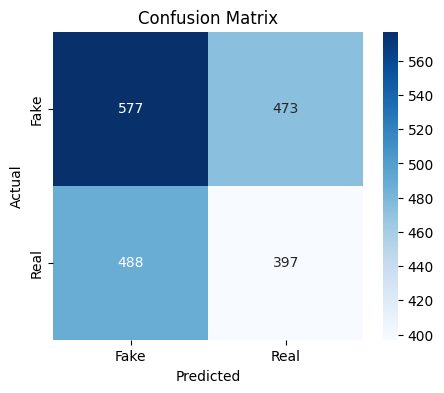

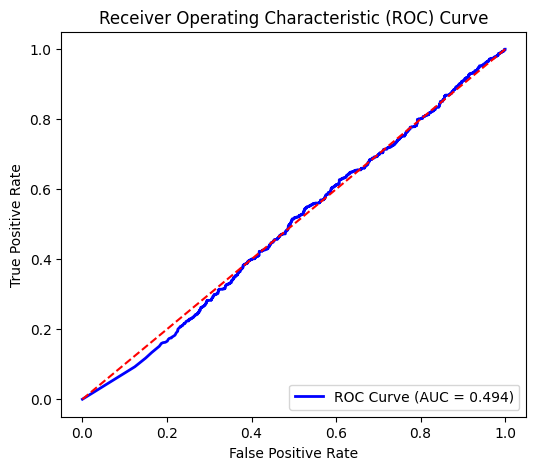

ROC-AUC Score: 0.494


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import AdamW

# --------------------------------------------------
# 1➑️ Load best saved model
# --------------------------------------------------
best_model = load_model('/content/drive/MyDrive/Dataset_split/best_model.keras', compile=False)

# Recompile the model after loading (as it was loaded with compile=False)
best_model.compile(
    optimizer=AdamW(learning_rate=1e-5, weight_decay=1e-6),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# --------------------------------------------------
# 2➑️ Evaluate model on test data
# --------------------------------------------------
loss, accuracy = best_model.evaluate(test_generator)
print(f"✅ Test Accuracy: {accuracy*100:.2f}%")

# --------------------------------------------------
# 3➑️ Predict classes
# --------------------------------------------------
y_pred_probs = best_model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# --------------------------------------------------
# 4➑️ Classification report
# --------------------------------------------------
print("\n Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Optional: Display as DataFrame
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
metrics_table = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Value': [round(accuracy*100, 2), round(precision*100, 2), round(recall*100, 2), round(f1*100, 2)]
}
import pandas as pd
metrics_df = pd.DataFrame(metrics_table)
print(metrics_df)

# --------------------------------------------------
# 5➑️ Confusion Matrix
# --------------------------------------------------
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --------------------------------------------------
# 6➑️ ROC Curve
# --------------------------------------------------
fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

print(f"ROC-AUC Score: {roc_auc:.3f}")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

path = '/content/drive/MyDrive/Dataset_split/test/Fake'
print(os.listdir(path)[:10])  # show first 10 files


['fake_682_aug_0.jpg', 'fake_537_aug_4.jpg', 'fake_110_aug_2.jpg', '2SIQN950SA.jpg', '0GCT5YZR4L.jpg', '0USLMHW31W.jpg', '0ZBLDEB0ZO.jpg', '2N4A4DI4LF.jpg', '0D3ZRI5TLI.jpg', '1YENO7FWW6.jpg']


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 19.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

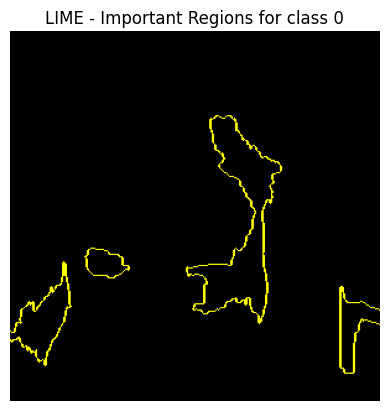

In [ ]:
# --- Install ---
!pip install lime --quiet

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from lime import lime_image
from skimage.segmentation import mark_boundaries

# --- Load your trained model (if not already loaded) ---
from tensorflow.keras.models import load_model
model_xcep = load_model('/content/drive/MyDrive/Dataset_split/best_model.keras')

# --- Image path ---
img_path = '/content/drive/MyDrive/Dataset_split/test/Fake/fake_682_aug_0.jpg'

# --- Preprocess image ---
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # normalize for model_xcep

# --- Prediction function for LIME ---
def predict_fn(images):
    return model_xcep.predict(images)

# --- LIME explainer ---
explainer = lime_image.LimeImageExplainer()

# --- Explain single image ---
explanation = explainer.explain_instance(
    image=x[0].astype('double'),
    classifier_fn=predict_fn,
    top_labels=2,
    hide_color=0,
    num_samples=1000
)

# --- Get explanation for top predicted label ---
top_label = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(
    label=top_label,
    positive_only=True,
    hide_rest=False,
    num_features=5,
    min_weight=0.0
)

# --- Display result ---
plt.imshow(mark_boundaries(temp / 255.0, mask))
plt.title(f"LIME - Important Regions for class {top_label}")
plt.axis('off')
plt.show()


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_9
Received: inputs=['Tensor(shape=(1, 299, 299, 3))']
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_9
Received: inputs=['Tensor(shape=(50, 299, 299, 3))']
  warnings.warn(msg)


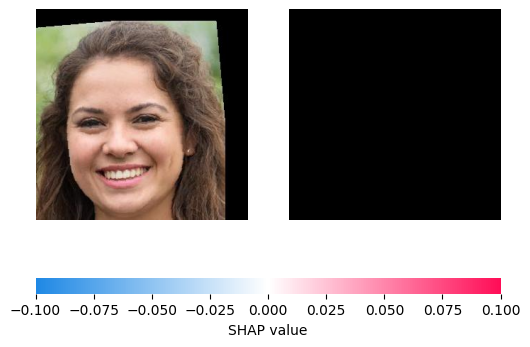

In [ ]:
# --- Install ---
!pip install shap --quiet

import shap
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import tensorflow as tf

# --- Load model ---
model_xcep = tf.keras.models.load_model('/content/drive/MyDrive/Dataset_split/best_model.keras')

# --- Load image ---
img_path = '/content/drive/MyDrive/Dataset_split/test/Fake/fake_682_aug_0.jpg'
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0

# --- Create small background dataset (e.g., few samples from test set) ---
background = x.copy()

# --- Create SHAP explainer ---
explainer = shap.GradientExplainer(model_xcep, background)

# --- Compute SHAP values ---
shap_values = explainer.shap_values(x)

# --- Visualize heatmap ---
shap.image_plot(shap_values, x)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted class: 0, Probability: 1.0000


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

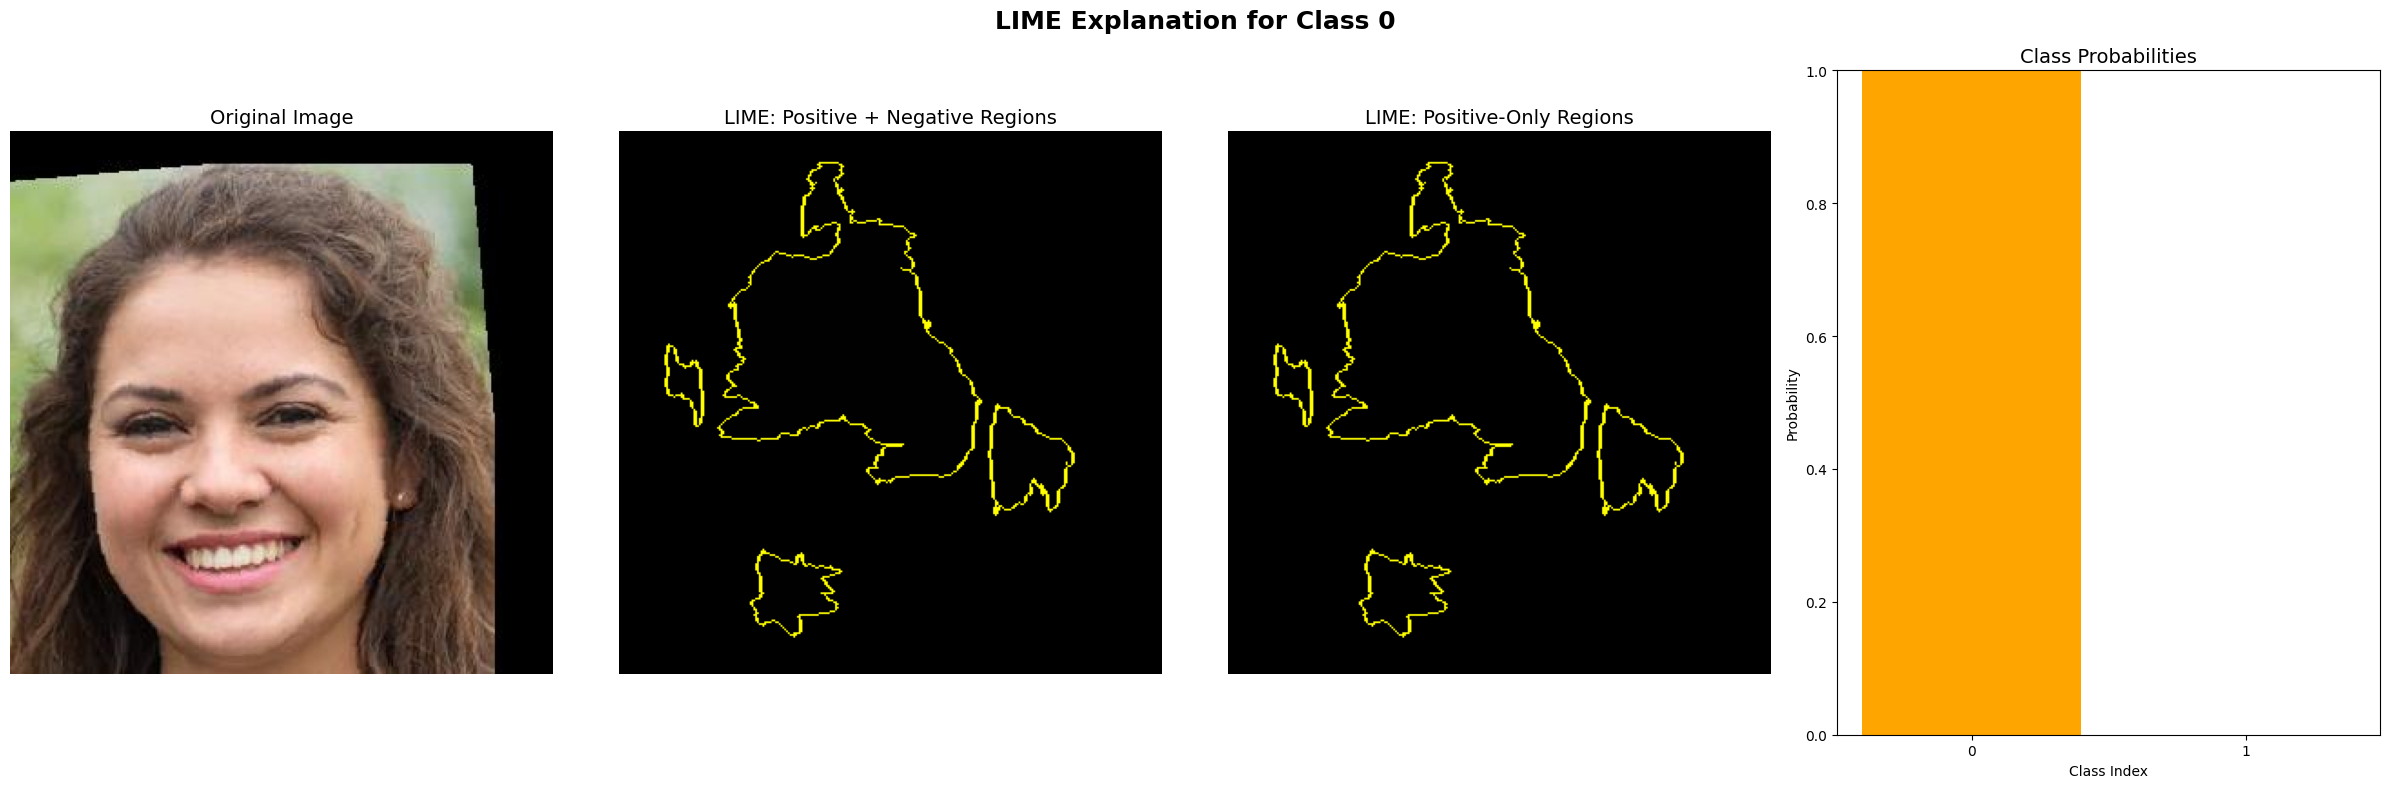

In [ ]:
# --- Install required libraries ---
!pip install lime --quiet
!pip install scikit-image --quiet

# --- Imports ---
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from lime import lime_image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions
from skimage.segmentation import mark_boundaries

# --- Use your trained model ---
# If already loaded in variable, just do:
model = model_xcep  # replace with your model variable if different

# --- Load and preprocess an image ---
img_path = '/content/drive/MyDrive/Dataset_split/test/Fake/fake_682_aug_0.jpg'  # example path

img = image.load_img(img_path, target_size=(299, 299))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_array)

# --- Model prediction ---
preds = model.predict(img_preprocessed)
pred_class = np.argmax(preds[0])
pred_prob = preds[0][pred_class]

print(f"Predicted class: {pred_class}, Probability: {pred_prob:.4f}")

# --- Define prediction function for LIME ---
def predict_fn(images):
    images = tf.convert_to_tensor(images)
    preds = model.predict(images)
    return preds

# --- Initialize LIME Explainer ---
explainer = lime_image.LimeImageExplainer()

# --- Generate LIME Explanation ---
explanation = explainer.explain_instance(
    img_array[0].astype('double'),
    predict_fn,
    labels=[pred_class],   # <-- specify the predicted class explicitly
    hide_color=0,
    num_samples=1000
)

# --- Get mask for the predicted label ---
top_label = pred_class # Use the predicted class directly

# Positive + Negative regions
temp_full, mask_full = explanation.get_image_and_mask(
    top_label,
    positive_only=False,
    num_features=10,
    hide_rest=False
)

# Positive-only regions
temp_pos, mask_pos = explanation.get_image_and_mask(
    top_label,
    positive_only=True,
    num_features=10,
    hide_rest=False
)

# --- Visualization Section ---
fig, axs = plt.subplots(1, 4, figsize=(24, 8))

# 1️⃣ Original image
axs[0].imshow(img)
axs[0].set_title("Original Image", fontsize=14)
axs[0].axis("off")

# 2️⃣ LIME Full (Positive + Negative)
axs[1].imshow(mark_boundaries(temp_full / 255.0, mask_full))
axs[1].set_title("LIME: Positive + Negative Regions", fontsize=14)
axs[1].axis("off")

# 3️⃣ LIME Positive Only
axs[2].imshow(mark_boundaries(temp_pos / 255.0, mask_pos))
axs[2].set_title("LIME: Positive-Only Regions", fontsize=14)
axs[2].axis("off")

# 4️⃣ Class Probabilities
axs[3].bar(range(len(preds[0])), preds[0], color='skyblue')
axs[3].set_title("Class Probabilities", fontsize=14)
axs[3].set_xlabel("Class Index")
axs[3].set_ylabel("Probability")
axs[3].set_xticks(range(len(preds[0])))
axs[3].set_ylim(0, 1)
axs[3].bar(pred_class, pred_prob, color='orange')

plt.suptitle(f"LIME Explanation for Class {pred_class}", fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
print("Model predicted class:", pred_class)
print("LIME top label:", explanation.top_labels[0])


Model predicted class: 0
LIME top label: 0


In [ ]:
# Test consistency between direct and LIME predictions
direct_pred = model.predict(img_preprocessed)
lime_pred = predict_fn(img_preprocessed)

print("Direct model prediction:", direct_pred)
print("LIME predict_fn output:", lime_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Direct model prediction: [[1.0000000e+00 3.5541828e-12]]
LIME predict_fn output: [[1.0000000e+00 3.5541828e-12]]


In [ ]:
weights = explanation.local_exp[pred_class]
print("Top contributing superpixels (index, weight):")
for i, w in weights[:10]:
    print(f"Superpixel {i}: Weight {w:.4f}")


Top contributing superpixels (index, weight):
Superpixel 11: Weight 0.0095
Superpixel 21: Weight 0.0084
Superpixel 33: Weight 0.0080
Superpixel 29: Weight 0.0077
Superpixel 52: Weight 0.0077
Superpixel 17: Weight 0.0075
Superpixel 6: Weight 0.0073
Superpixel 38: Weight 0.0073
Superpixel 16: Weight 0.0072
Superpixel 23: Weight 0.0072


**SALIENCY MAPS**

✅ Model loaded successfully!


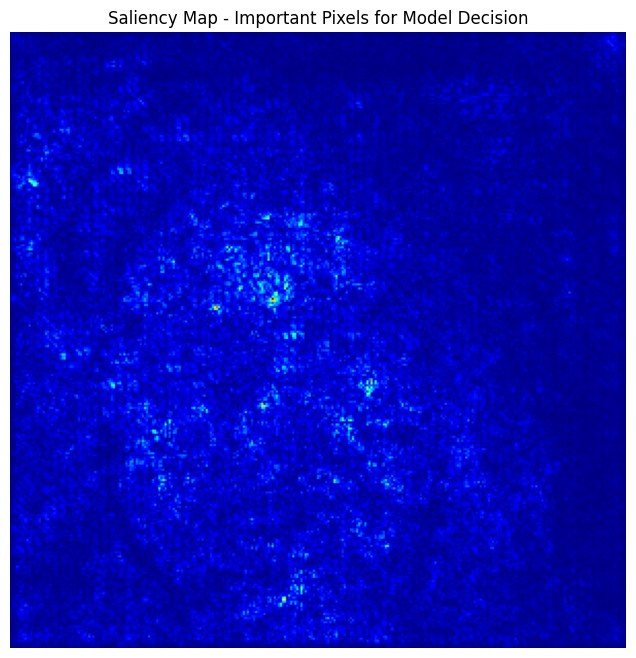

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# 1️⃣ Load model
model_path = '/content/drive/MyDrive/Dataset_split/best_model.keras'
model_xcep = tf.keras.models.load_model(model_path, compile=False)
print("✅ Model loaded successfully!")

# 2️⃣ Load and preprocess image
img_path = '/content/drive/MyDrive/Dataset_split/test/Fake/fake_682_aug_0.jpg'
img_size = (299, 299)
img = image.load_img(img_path, target_size=img_size)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.xception.preprocess_input(img_array)

# 3️⃣ Compute Saliency Map
img_array_tf = tf.convert_to_tensor(img_array)
with tf.GradientTape() as tape:
    tape.watch(img_array_tf)
    preds = model_xcep(img_array_tf)
    top_class = tf.argmax(preds[0])
    loss = preds[:, top_class]

# Gradient of the output neuron (top class) w.r.t. input image
grads = tape.gradient(loss, img_array_tf)

# 4️⃣ Process gradients
saliency = tf.reduce_max(tf.abs(grads), axis=-1)[0]  # take max across color channels
saliency = (saliency - tf.reduce_min(saliency)) / (tf.reduce_max(saliency) - tf.reduce_min(saliency))  # normalize

# 5️⃣ Visualize Saliency Map
plt.figure(figsize=(8, 8))
plt.imshow(saliency, cmap='jet')
plt.axis('off')
plt.title("Saliency Map - Important Pixels for Model Decision")
plt.show()


✅ Model loaded successfully!


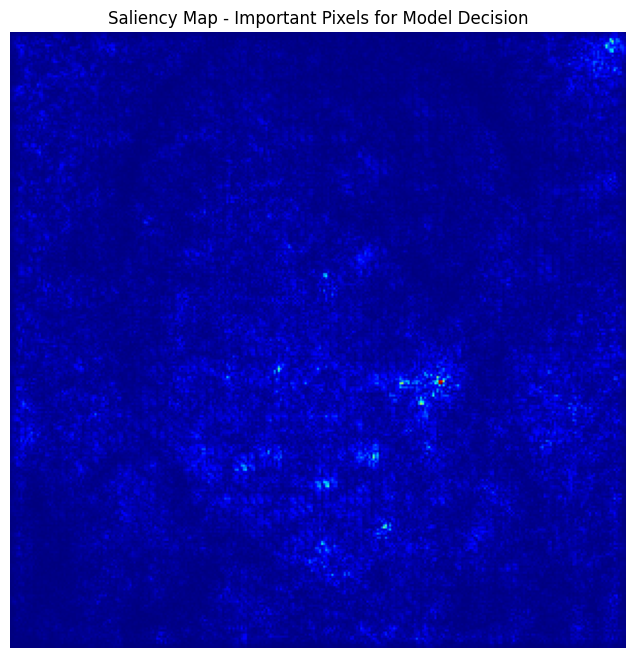

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# 1️⃣ Load model
model_path = '/content/drive/MyDrive/Dataset_split/best_model.keras'
model_xcep = tf.keras.models.load_model(model_path, compile=False)
print("✅ Model loaded successfully!")

# 2️⃣ Load and preprocess image
img_path = '/content/drive/MyDrive/Dataset_split/test/Fake/0GCT5YZR4L.jpg'
img_size = (299, 299)
img = image.load_img(img_path, target_size=img_size)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.xception.preprocess_input(img_array)

# 3️⃣ Compute Saliency Map
img_array_tf = tf.convert_to_tensor(img_array)
with tf.GradientTape() as tape:
    tape.watch(img_array_tf)
    preds = model_xcep(img_array_tf)
    top_class = tf.argmax(preds[0])
    loss = preds[:, top_class]

# Gradient of the output neuron (top class) w.r.t. input image
grads = tape.gradient(loss, img_array_tf)

# 4️⃣ Process gradients
saliency = tf.reduce_max(tf.abs(grads), axis=-1)[0]  # take max across color channels
saliency = (saliency - tf.reduce_min(saliency)) / (tf.reduce_max(saliency) - tf.reduce_min(saliency))  # normalize

# 5️⃣ Visualize Saliency Map
plt.figure(figsize=(8, 8))
plt.imshow(saliency, cmap='jet')
plt.axis('off')
plt.title("Saliency Map - Important Pixels for Model Decision")
plt.show()


In [ ]:
import os

path = '/content/drive/MyDrive/Dataset_split/test/Real'
print(os.listdir(path)[:10])  # show first 10 files

['02849.jpg', 'real_42_aug_2.jpg', '01968.jpg', '01941.jpg', 'real_379_aug_2.jpg', '02051.jpg', 'real_132_aug_1.jpg', '02339.jpg', 'real_234_aug_4.jpg', 'real_451_aug_3.jpg']


✅ Model loaded successfully!


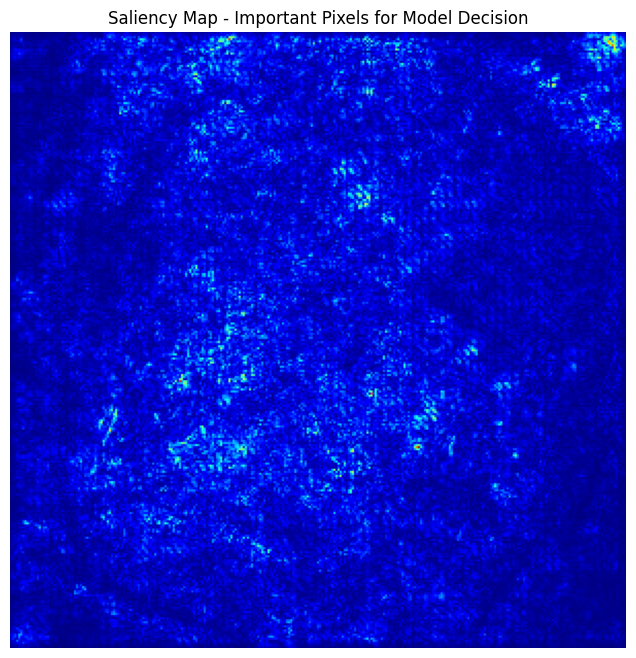

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# 1️⃣ Load model
model_path = '/content/drive/MyDrive/Dataset_split/best_model.keras'
model_xcep = tf.keras.models.load_model(model_path, compile=False)
print("✅ Model loaded successfully!")

# 2️⃣ Load and preprocess image
img_path = '/content/drive/MyDrive/Dataset_split/test/Real/real_42_aug_2.jpg'
img_size = (299, 299)
img = image.load_img(img_path, target_size=img_size)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.xception.preprocess_input(img_array)

# 3️⃣ Compute Saliency Map
img_array_tf = tf.convert_to_tensor(img_array)
with tf.GradientTape() as tape:
    tape.watch(img_array_tf)
    preds = model_xcep(img_array_tf)
    top_class = tf.argmax(preds[0])
    loss = preds[:, top_class]

# Gradient of the output neuron (top class) w.r.t. input image
grads = tape.gradient(loss, img_array_tf)

# 4️⃣ Process gradients
saliency = tf.reduce_max(tf.abs(grads), axis=-1)[0]  # take max across color channels
saliency = (saliency - tf.reduce_min(saliency)) / (tf.reduce_max(saliency) - tf.reduce_min(saliency))  # normalize

# 5️⃣ Visualize Saliency Map
plt.figure(figsize=(8, 8))
plt.imshow(saliency, cmap='jet')
plt.axis('off')
plt.title("Saliency Map - Important Pixels for Model Decision")
plt.show()


✅ Model loaded successfully!


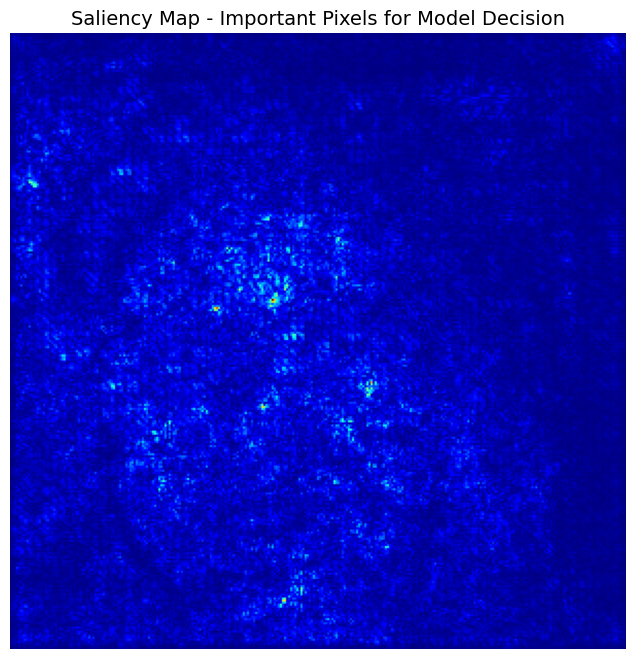

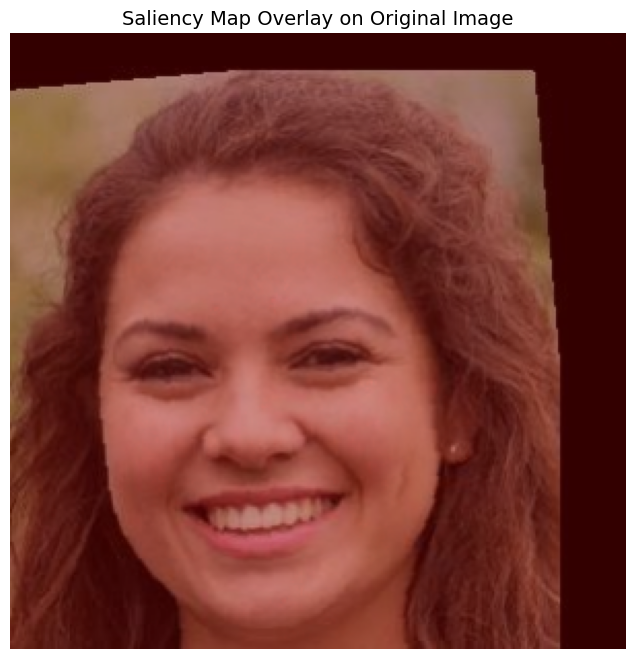


🧠 INTERPRETATION:

• This Saliency Map highlights *which pixels* most influenced the model’s decision.
• Blue regions → Low influence (model ignored them)
• Yellow/Red regions → High influence (model focused on them)
• The highlighted areas are where the model 'looked' when classifying the image.
• If your image is FAKE, the bright areas indicate features like texture or lighting artifacts.
• If REAL, the bright areas may correspond to key features like facial details or edges.



In [ ]:
# --------------------------------------------------
# 1️⃣ Import required libraries
# --------------------------------------------------
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# --------------------------------------------------
# 2️⃣ Load the trained model
# --------------------------------------------------
model_path = '/content/drive/MyDrive/Dataset_split/best_model.keras'
model_xcep = load_model(model_path, compile=False)
print("✅ Model loaded successfully!")

# --------------------------------------------------
# 3️⃣ Load and preprocess the input image
# --------------------------------------------------
img_path = '/content/drive/MyDrive/Dataset_split/test/Fake/fake_682_aug_0.jpg'  # Change if needed
img_size = (299, 299)

img = image.load_img(img_path, target_size=img_size)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.xception.preprocess_input(img_array)

# --------------------------------------------------
# 4️⃣ Create the saliency map
# --------------------------------------------------
# Convert to tensor
img_tensor = tf.convert_to_tensor(img_array)

# Use GradientTape to track gradients
with tf.GradientTape() as tape:
    tape.watch(img_tensor)
    preds = model_xcep(img_tensor)
    class_idx = tf.argmax(preds[0])
    class_output = preds[:, class_idx]

# Compute gradient of the class output wrt input image
grads = tape.gradient(class_output, img_tensor)

# Take the maximum absolute gradient across color channels
saliency = tf.reduce_max(tf.abs(grads), axis=-1)[0]

# Normalize between 0 and 1
saliency = (saliency - tf.reduce_min(saliency)) / (tf.reduce_max(saliency) + 1e-10)
saliency = saliency.numpy()

# --------------------------------------------------
# 5️⃣ Display the saliency map
# --------------------------------------------------
plt.figure(figsize=(8, 8))
plt.imshow(saliency, cmap='jet')
plt.axis("off")
plt.title("Saliency Map - Important Pixels for Model Decision", fontsize=14)
plt.show()

# --------------------------------------------------
# 6️⃣ Overlay saliency on the original image
# --------------------------------------------------
orig = cv2.imread(img_path)
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
orig = cv2.resize(orig, img_size)

# Convert saliency map to heatmap
heatmap = np.uint8(255 * saliency)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# Combine with original image
overlay = cv2.addWeighted(orig, 0.6, heatmap, 0.4, 0)

# Display overlay
plt.figure(figsize=(8, 8))
plt.imshow(overlay)
plt.axis("off")
plt.title("Saliency Map Overlay on Original Image", fontsize=14)
plt.show()

# --------------------------------------------------
# 🧩 Interpretation
# --------------------------------------------------
print("\n🧠 INTERPRETATION:")
print("""
• This Saliency Map highlights *which pixels* most influenced the model’s decision.
• Blue regions → Low influence (model ignored them)
• Yellow/Red regions → High influence (model focused on them)
• The highlighted areas are where the model 'looked' when classifying the image.
• If your image is FAKE, the bright areas indicate features like texture or lighting artifacts.
• If REAL, the bright areas may correspond to key features like facial details or edges.
""")
